<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-cSHVUG kuVqkE contents__title"><h1 class="hchang-content__head">1. 들어가며</h1></div><div><div class="MarkdownView_markdownView__loFxX"><h3>전처리는 왜 중요할까?</h3>
<hr/>
<p>안녕하세요, 오늘은 모델에 데이터를 넣기 전까지의 과정, 즉 데이터 전처리를 집중적으로 볼 것입니다.</p>
<p>“데이터 분석의 8할은 데이터 전처리이다.”라는 말이 있습니다.
왜 데이터 분석에 있어 전처리는 중요한 걸까요?</p>
<p>전처리에 따라서 데이터 분석의 질이 달라지기 때문입니다. 전처리가 충분히 되어있지 않거나 잘못된 데이터를 사용한 경우 분석 결과의 신뢰도가 떨어지고, 예측 모델의 정확도도 떨어질 것입니다. 전처리가 잘 되어 있는 경우 데이터 분석의 질이 높아지고 예측 모델의 성능을 높일 수 있습니다.</p>
<p>물론 데이터를 전처리하는 작업은 지루해 보일 수 있지만, 꼭 필요한 과정인 만큼 다양한 데이터로 연습을 해보시길 바랍니다.</p>
<p>그럼 시작하겠습니다.</p>
<h3>데이터를 준비하자!</h3>
<hr/></div><div id="block-f48a98cf-6663-43f5-95ed-c6067cca7312-document_block"><a download="" href="https://d3s0tskafalll9.cloudfront.net/media/documents/trade.csv">trade.csv</a></div><div class="MarkdownView_markdownView__loFxX"><p>위 파일을 다운로드하기 위해 아래 셀을 실행해봅니다.</p>
</div><div id="block-71431a09-0b09-468f-8886-5470936d595b-jupyter_block">

In [ ]:
!wget https://d3s0tskafalll9.cloudfront.net/media/documents/trade.csv

--2022-12-08 09:31:59--  https://d3s0tskafalll9.cloudfront.net/media/documents/trade.csv
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 99.84.170.144, 99.84.170.113, 99.84.170.48, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|99.84.170.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13860 (14K) [text/csv]
Saving to: ‘trade.csv’

trade.csv           100%[===================>]  13.54K  --.-KB/s    in 0.001s  

2022-12-08 09:31:59 (22.6 MB/s) - ‘trade.csv’ saved [13860/13860]



In [ ]:
print("hello World!")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("👽 Hello.")


👽 Hello.


</div><div class="MarkdownView_markdownView__loFxX"><p>준비된 <code>trade.csv</code> 파일은 <a href="https://unipass.customs.go.kr/ets/index.do" target="_blank">관세청 수출입 무역 통계</a> 에서 가공한 데이터입니다.</p>
<p>특정 국가에 대한 월별 수출입 건수와 금액(단위:천 불(USD 1,000))이 있습니다.  무역수지는 수출금액-수입금액이 됩니다.</p></div><div id="block-5b12bc61-b350-454f-9223-882abbd1fbdc-jupyter_block">

In [ ]:
import os

csv_file_path = 'trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


</div><div class="MarkdownView_markdownView__loFxX"><h3>학습 목표</h3>
<hr/>
<ul>
<li>중복된 데이터를 찾아 제거할 수 있고, 결측치(missing data)를 제거하거나 채워 넣을 수 있다.</li>
<li>데이터를 정규화시킬 수 있다.</li>
<li>이상치(outlier)를 찾고, 이를 처리할 수 있다.</li>
<li>범주형 데이터를 원-핫 인코딩할 수 있다.</li>
<li>연속적인 데이터를 구간으로 나눠 범주형 데이터로 변환할 수 있다.</li>
</ul>
<h3>학습 목차</h3>
<hr/>
<ol>
<li>결측치(Missing Data)</li>
<li>중복된 데이터</li>
<li>이상치(Outlier)</li>
<li>정규화(Normalization)</li>
<li>원-핫 인코딩(One-Hot Encoding)</li>
<li>구간화(Binning)</li>
</ol></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-cSHVUG kuVqkE contents__title"><h1 class="hchang-content__head">2. 결측치(Missing Data)</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>현실에서 여러분이 다룰 데이터는 결측치를 포함하고 있는 경우가 많습니다. 물론 데이터를 수집하는 과정에서 누락되지 않도록 하는 것이 더 좋은 방법이지만 이미 결측치가 존재한다면 이를 처리해 주어야 합니다.</p>
<p>결측치를 처리하는 방법은 크게 두 가지가 있습니다.</p>
<ol>
<li>결측치가 있는 데이터를 제거한다.</li>
<li>결측치를 어떤 값으로 대체한다.
<ul>
<li>결측치를 대체하는 방법은 다양한데 데이터마다 특성을 반영하여 해결해야 합니다.</li>
</ul>
</li>
</ol>
<p>우선 결측치 여부를 먼저 살펴보겠습니다.</p></div><div id="block-6ef1aa54-0ea6-4c1c-aee1-2cbd98c62f31-jupyter_block">

In [ ]:
print('전체 데이터 건수:', len(trade))


전체 데이터 건수: 199


In [ ]:
trade.count()

기간      199
국가명     199
수출건수    196
수출금액    195
수입건수    196
수입금액    196
무역수지    195
기타사항      0
dtype: int64

</div><div class="MarkdownView_markdownView__loFxX"><p>전체 데이터 건수에서 각 컬럼별 값이 있는 데이터 수를 빼주면 컬럼별 결측치의 개수를 알 수 있습니다.</p></div><div id="block-85ad9f79-78d1-4485-92d7-6f3b895dcc2a-jupyter_block">

In [ ]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()


컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

</div><div class="MarkdownView_markdownView__loFxX"><p><code>'기타사항'</code>을 보시면 전부 결측치라는 것을 알 수 있습니다. 이는 아무런 정보가 없는 컬럼이므로 삭제하도록 하겠습니다.</p></div><div id="block-0fe48977-6d4f-47af-8908-d526b95040d8-jupyter_block">

In [ ]:
trade = trade.drop('기타사항', axis=1)
trade.head()


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


</div><div class="MarkdownView_markdownView__loFxX"><p>기타사항 컬럼이 삭제된 것을 확인해 보았습니다.</p>
<p>이제 결측치가 있는 행을 살펴보겠습니다.</p>
<p><code>DataFrame.isnull()</code>은 데이터마다 결측치 여부를 True, False로 반환합니다. <code>DataFrame.any(axis=1)</code>는 행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반환합니다.</p>
<p>두 메서드를 조합하여 결측치가 하나라도 있는 행을 찾아보겠습니다.</p>
<p>DataFrame에 <code>isnull()</code>을 적용하고, 여기도 또 <code>any(axis=1)</code> 메서드를 적용합니다. 이 결과, '각 행이 결측치가 하나라도 있는지' 여부를 불리언 값으로 가진 Series가 출력됩니다.</p></div><div id="block-a9a7fe9b-a3ae-43fd-988d-e4df06690003-jupyter_block">

In [ ]:
trade.isnull()


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


</div><div id="block-cd07f262-3b84-471c-80b6-f137d9104bdb-jupyter_block">

In [ ]:
trade.isnull().any(axis=1)


0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

</div><div class="MarkdownView_markdownView__loFxX"><p><code>trade.isnull().any(axis=1)</code>을 다시 DataFrame에 넣어주면 값이 True인 데이터만 추출해 줍니다.</p></div><div id="block-74883d8d-6e12-4950-91cc-432573a21f2d-jupyter_block">

In [ ]:
trade[trade.isnull().any(axis=1)]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


</div><div class="MarkdownView_markdownView__loFxX"><p>index 191 데이터는 수출금액과 무역수지 컬럼이 빠져있고, index 196, 197, 198은 기간, 국가명을 제외하고 모두 결측치입니다. 이 경우 index 191 데이터는 삭제하기보다 특정 값으로 대체하는 것이 좋습니다. 반면 index 196, 197, 198은 제거하는 것이 바람직합니다.</p>
<p>우선 '수출건수', '수출금액', '수입건수', '수입금액', '무역수지' 열이 모두 결측치인 index 196, 197, 198을 삭제하겠습니다.</p>
<p>DataFrame의 <code>dropna</code>는 결측치를 삭제해 주는 메서드입니다. <code>subset</code> 옵션으로 특정 컬럼들을 선택했습니다. <code>how</code> 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로 'all'을 선택합니다('any': 하나라도 결측치인 경우). <code>inplace</code> 옵션으로 해당 DataFrame 내부에 바로 적용시켰습니다.</p></div><div id="block-089e5d3b-38a3-4d77-9a03-f04e08a972cd-jupyter_block">

In [ ]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")


👽 It's okay, no biggie.


</div><div id="block-7ee24820-209f-4dec-912b-a5983f2b0e02-jupyter_block">

In [ ]:
trade[trade.isnull().any(axis=1)]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


</div><div class="MarkdownView_markdownView__loFxX"><p>index 191과 같이 수치형 데이터를 보완할 방법은 많습니다.</p>
<ol>
<li>
<p>특정 값을 지정해 줄 수 있습니다. 그러나 결측치가 많은 경우, 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아지는 문제가 생길 수 있습니다.</p>
</li>
<li>
<p>평균, 중앙값 등으로 대체할 수 있습니다. 1번에서 특정 값으로 대체했을 때와 마찬가지로 결측치가 많은 경우 데이터의 분산이 실제보다 작아지는 문제가 발생할 수 있습니다.</p>
</li>
<li>
<p>다른 데이터를 이용해 예측값으로 대체할 수 있습니다. 예를 들어 머신러닝 모델로 2020년 4월 미국의 예측값을 만들고, 이 값으로 결측치를 보완할 수 있습니다.</p>
</li>
<li>
<p>시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있습니다.</p>
</li>
</ol>
<p>index 191은 4번 방법을 통해 보완하도록 하겠습니다.</p>
<p>trade 데이터셋에서 국가명인 미국이며 2020년 3월과 5월 데이터셋을 출력합니다.</p></div><div id="block-062b55b0-aef1-49a5-a6be-0f488af77bbe-jupyter_block">

In [ ]:
trade.loc[[188, 191, 194]]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


</div><div class="MarkdownView_markdownView__loFxX"><p>실행 결과 각 항목의 인덱스는 188, 194임을 얻었습니다.
index 191의 수출금액 컬럼값을 이전 달과 다음 달의 평균으로 채우도록 합니다.</p></div><div id="block-b8d1af47-ecc1-4005-9f2c-194278c76fea-jupyter_block">

In [ ]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


</div><div class="MarkdownView_markdownView__loFxX"><p>index 191의 무역수지 컬럼은 수출금액과 수입금액의 차이를 이용하여 채우도록 하겠습니다.</p></div><div id="block-5affbdde-d23a-4eeb-9bd5-7d92ebc73743-jupyter_block">

In [ ]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] 
trade.loc[[191]]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


</div><div class="MarkdownView_markdownView__loFxX"><p>다른 방법을 이용하여 index 191을 채워보는 연습을 하시기 바랍니다.</p></div><div id="block-733a1b41-f0b7-41bd-ba30-441c27333f70-jupyter_block">

In [ ]:
#-- 아래에 코드를 작성해 주세요. --#


</div><div class="MarkdownView_markdownView__loFxX"><p>지금까지 데이터가 수치형인 경우 결측치를 삭제하거나 대체하는 방법을 실습해 보았습니다. 데이터가 범주형인 경우는 어떻게 해야 할까요? 이는 수치형일 때와 유사합니다.</p>
<ol>
<li>
<p>특정 값을 지정해 줄 수 있습니다. 예를 들어 ‘기타’, ‘결측’과 같이 새로운 범주를 만들어 결측치를 채울 수 있습니다.</p>
</li>
<li>
<p>최빈값 등으로 대체한다. 결측치가 많은 경우 최빈값이 지나치게 많아질 수 있으므로 결측치가 많을 때는 다른 방법을 사용한다.</p>
</li>
<li>
<p>다른 데이터를 이용해 예측값으로 대체할 수 있다.</p>
</li>
<li>
<p>시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 특정인의 2019년 직업이 결측치이고, 2018년과 2020년 직업이 일치한다면 그 값으로 보완할 수 있습니다. 만약 다르다면 둘 중 하나로 보완하도록 합니다.</p>
</li>
</ol></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-cSHVUG kuVqkE contents__title"><h1 class="hchang-content__head">3. 중복된 데이터</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>데이터를 수집하는 과정에서 중복된 데이터가 생길 수 있습니다. 같은 값을 가진 데이터 없이 행(row)별로 값이 유일해야 한다면 중복된 데이터를 제거해야 합니다.</p>
<p>우선 중복된 데이터를 확인합니다. <code>DataFrame.duplicated()</code>는 중복된 데이터 여부를 불리언 값으로 반환해 줍니다.</p></div><div id="block-54daf2d9-cfac-435d-bef0-46eed1bddfe6-jupyter_block">

In [ ]:
trade.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

</div><div id="block-f691502f-fa75-4e5b-b75e-788e4689f692-jupyter_block">

In [ ]:
trade[trade.duplicated()]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


</div><div id="block-b79d71e1-e8ec-4d9c-9bf3-3c1414b18bf7-jupyter_block">

In [ ]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


</div><div class="MarkdownView_markdownView__loFxX"><p>index 186, 187이 중복되어 있습니다.</p>
<p>pandas에서는 <code>DataFrame.drop_duplicates</code>를 통해 중복된 데이터를 손쉽게 삭제할 수 있습니다.</p></div><div id="block-997377e9-2649-4c49-be88-d0dea6036fc3-jupyter_block">

In [ ]:
trade.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")


👽 It's okay, no biggie.


</div><div class="MarkdownView_markdownView__loFxX"><p><code>DataFrame.drop_duplicates</code>를 좀 더 자세히 살펴볼까요?</p>
<p>다음과 같이 id와 name을 컬럼으로 갖는 df가 있다고 해봅시다.</p></div><div id="block-5e86ddc6-45f4-495a-b44a-325ec8123cc0-jupyter_block">

In [ ]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df


,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


</div><div class="MarkdownView_markdownView__loFxX"><p>id가 002인 데이터가 2개 있습니다.  id가 사람마다 unique 하다고 할 때, 둘 중 하나는 삭제해야 합니다.</p>
<p>index가 클수록 나중에 들어온 데이터이고, 사용자가 이름을 수정했을 때 업데이트가 되지 않고 삽입이 되어 생긴 문제라고 가정합니다. 즉, id가 중복된 경우 맨 나중에 들어온 값만 남겨야 합니다.</p>
<p><code>DataFrame.drop_duplicates</code>의 <code>subset</code>, <code>keep</code> 옵션을 통해 손쉽게 중복을 제거할 수 있습니다.</p>
<ul>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html" target="_blank">DataFrame.drop_duplicates</a></li>
</ul></div><div id="block-d253a605-ba9b-47a4-b9d8-ff20eae681d8-jupyter_block">

In [ ]:
df.drop_duplicates(subset=['id'], keep='last')


,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


</div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-cSHVUG kuVqkE contents__title"><h1 class="hchang-content__head">4. 이상치(Outlier)</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>trade 데이터에서 큰 값을 가지는 이상치가 있다고 가정해 봅시다. 이상치란 대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값을 의미합니다.</p>
<p>Min-Max Scaling 해보면 대부분의 값은 0에 가깝고 이상치만 1에 가까운 값을 가지게 될 것입니다. 이렇게 몇 개의 이상치 때문에 대부분 값의 차이는 의미가 거의 없어지게 됩니다. 극단적인 값이 생기는 경우를 제외하고 데이터를 고려하고 싶은 경우 이상치를 제거하고 분석합니다.</p>
<p>그렇다면 이상치를 어떻게 찾아내야 할까요? 현실에서 이상치를 찾는 것(anomaly detection) 자체가 큰 분야입니다.</p>
<p>가장 먼저 생각해 볼 수 있는 간단하고 자주 사용되는 방법은 평균과 표준편차를 이용하는 <code>z score</code> 방법입니다.</p>
<p>평균을 빼주고 표준편차로 나눠 z score<span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo stretchy="false">(</mo><mfrac><mrow><mi>X</mi><mo>−</mo><mi>μ</mi></mrow><mi>σ</mi></mfrac><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">({\frac {X-\mu }{\sigma }})</annotation></semantics></math></span><span aria-hidden="true" class="katex-html"><span class="base"><span class="strut" style="height: 1.26944em; vertical-align: -0.345em;"></span><span class="mopen">(</span><span class="mord"><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.924439em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.03588em;">σ</span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.44611em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.07847em;">X</span><span class="mbin mtight">−</span><span class="mord mathnormal mtight">μ</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.345em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span></span><span class="mclose">)</span></span></span></span></span>를 계산합니다. 그리고 z score가 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단합니다. 기준을 작게 하면 이상치라고 판단하는 데이터가 많아지고, 기준을 크게 하면 이상치라고 판단하는 데이터가 적어집니다.</p>
<p>이상치를 판단한 뒤 어떻게 해야 할까요?</p>
<ol>
<li>
<p>가장 간단한 방법으로 이상치를 삭제할 수 있습니다. 이상치를 원래 데이터에서 삭제하고, 이상치끼리 따로 분석하는 방안도 있습니다.</p>
</li>
<li>
<p>이상치를 다른 값으로 대체할 수 있습니다. 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있습니다. 예를 들어 최댓값, 최솟값을 설정해 데이터의 범위를 제한할 수 있습니다.</p>
</li>
<li>
<p>혹은 결측치와 마찬가지로 다른 데이터를 활용하여 예측 모델을 만들어 예측값을 활용할 수도 있습니다.</p>
</li>
<li>
<p>아니면 binning을 통해 수치형 데이터를 범주형으로 바꿀 수도 있습니다.</p>
</li>
</ol></div><div class="MarkdownView_markdownView__loFxX"><h3>z-score method</h3>
<hr/>
<p>이제 우리 데이터를 처리해 봅시다. 이상치인 데이터의 인덱스를 리턴하는 <code>outlier</code>라는 함수를 만들었습니다. 데이터프레임 <code>df</code>, 컬럼 <code>col</code>, 기준 <code>z</code>를 인풋으로 받습니다.</p>
<ul>
<li>
<p><code>abs(df[col] - np.mean(df[col]))</code> : 데이터에서 평균을 빼준 것에 절대값을 취합니다.</p>
</li>
<li>
<p><code>abs(df[col] - np.mean(df[col]))/np.std(df[col])</code> : 위에 한 작업에 표준편차로 나눠줍니다.</p>
</li>
<li>
<p><code>df[abs(df[col] - np.mean(df[col]))/np.std(df[col])&gt;z].index</code>: 값이 z보다 큰 데이터의 인덱스를 추출합니다.</p>
</li>
</ul></div><div id="block-f417df3b-822f-49ea-b89a-0d166f61e8e5-jupyter_block">

In [ ]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")


👽 It's okay, no biggie.


</div><div id="block-3b9a15a9-21fe-41b2-afb0-b57616bb07de-jupyter_block">

In [ ]:
trade.loc[outlier(trade, '무역수지', 1.5)]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


</div><div id="block-2bae70d6-9a5b-44ac-8e31-0d014975dd86-jupyter_block">

In [ ]:
trade.loc[outlier(trade, '무역수지', 2)]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


</div><div id="block-e8389d67-dfc3-465b-a532-90c429f76d70-jupyter_block">

In [ ]:
trade.loc[outlier(trade, '무역수지', 3)]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


</div><div class="MarkdownView_markdownView__loFxX"><p>무역수지의 이상치를 확인하는데 기준 되는 값이 클수록 이상치가 적어지는 것을 확인할 수 있습니다.</p>
<p>이제 <code>not_outlier</code>라는 함수를 통해 무역수지가 이상치 값이 아닌 데이터만 추출하도록 하겠습니다.</p></div><div id="block-e0423d53-d170-4b14-8f20-b76e2a02a1aa-jupyter_block">

In [ ]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index
print("👽 It's okay, no biggie.")


👽 It's okay, no biggie.


</div><div id="block-a44eaa4c-b93e-4691-b899-6270af9d4abb-jupyter_block">

In [ ]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


</div><div class="MarkdownView_markdownView__loFxX"><h3>IQR method</h3>
<hr/>
<p>하지만 이상치를 찾는 방법에는 위에 설명한 z-score 방법만 있는 것은 아닙니다. 그리고 z-score 방법은 몇 가지 뚜렷한 한계점을 가지고 있습니다.</p>
<p>z-score 방법의 대안으로 사분위 범위수 IQR(Interquartile range) 로 이상치를 알아내는 방법을 알아보겠습니다.</p>
<p>이해를 돕기 위해 아웃라이어가 포함된 임의의 데이터를 만들어보겠습니다.</p></div><div id="block-21585b06-e221-4019-bd5d-a2462faf8246-jupyter_block">

In [ ]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data


array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

</div><div class="MarkdownView_markdownView__loFxX"><p>아래의 박스 플롯에서 박스를 벗어난 점들이 보이시나요?</p></div><div id="block-fe8ca810-aabd-4478-9d69-eb8bc74d73ea-jupyter_block">

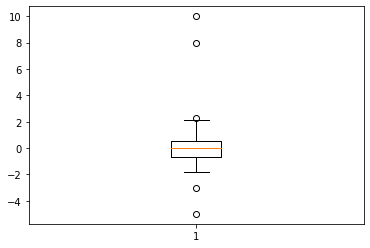

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()


</div><div class="MarkdownView_markdownView__loFxX"><p>우리는 사분위 범위수 IQR(Interquartile range)을 이용하여 이상치를 찾아낼 수 있습니다.</p>
<div class="math math-display"><span class="katex-display"><span class="katex"><span class="katex-mathml"><math display="block" xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>I</mi><mi>Q</mi><mi>R</mi><mo>=</mo><msub><mi>Q</mi><mn>3</mn></msub><mo>−</mo><msub><mi>Q</mi><mn>1</mn></msub></mrow><annotation encoding="application/x-tex">IQR=Q_3-Q_1</annotation></semantics></math></span><span aria-hidden="true" class="katex-html"><span class="base"><span class="strut" style="height: 0.87777em; vertical-align: -0.19444em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">I</span><span class="mord mathnormal">Q</span><span class="mord mathnormal" style="margin-right: 0.00773em;">R</span><span class="mspace" style="margin-right: 0.277778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.277778em;"></span></span><span class="base"><span class="strut" style="height: 0.87777em; vertical-align: -0.19444em;"></span><span class="mord"><span class="mord mathnormal">Q</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.301108em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">3</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.222222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.222222em;"></span></span><span class="base"><span class="strut" style="height: 0.87777em; vertical-align: -0.19444em;"></span><span class="mord"><span class="mord mathnormal">Q</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.301108em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">1</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span></span></span></span></span></div>
<p>즉, IQR은 제 3사분위수에서 제 1사분위 값을 뺀 값으로 데이터의 중간 50%의 범위라고 생각하시면 됩니다. <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>Q</mi><mn>1</mn></msub><mo>−</mo><mn>1.5</mn><mo>∗</mo><mi>I</mi><mi>Q</mi><mi>R</mi></mrow><annotation encoding="application/x-tex">Q_1 - 1.5*IQR</annotation></semantics></math></span><span aria-hidden="true" class="katex-html"><span class="base"><span class="strut" style="height: 0.87777em; vertical-align: -0.19444em;"></span><span class="mord"><span class="mord mathnormal">Q</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.301108em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">1</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.222222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.222222em;"></span></span><span class="base"><span class="strut" style="height: 0.64444em; vertical-align: 0em;"></span><span class="mord">1</span><span class="mord">.</span><span class="mord">5</span><span class="mspace" style="margin-right: 0.222222em;"></span><span class="mbin">∗</span><span class="mspace" style="margin-right: 0.222222em;"></span></span><span class="base"><span class="strut" style="height: 0.87777em; vertical-align: -0.19444em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">I</span><span class="mord mathnormal">Q</span><span class="mord mathnormal" style="margin-right: 0.00773em;">R</span></span></span></span></span>보다 왼쪽에 있거나, <span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mi>Q</mi><mn>3</mn></msub><mo>+</mo><mn>1.5</mn><mo>∗</mo><mi>I</mi><mi>Q</mi><mi>R</mi></mrow><annotation encoding="application/x-tex">Q_3 + 1.5*IQR</annotation></semantics></math></span><span aria-hidden="true" class="katex-html"><span class="base"><span class="strut" style="height: 0.87777em; vertical-align: -0.19444em;"></span><span class="mord"><span class="mord mathnormal">Q</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.301108em;"><span style="top: -2.55em; margin-left: 0em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">3</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.222222em;"></span><span class="mbin">+</span><span class="mspace" style="margin-right: 0.222222em;"></span></span><span class="base"><span class="strut" style="height: 0.64444em; vertical-align: 0em;"></span><span class="mord">1</span><span class="mord">.</span><span class="mord">5</span><span class="mspace" style="margin-right: 0.222222em;"></span><span class="mbin">∗</span><span class="mspace" style="margin-right: 0.222222em;"></span></span><span class="base"><span class="strut" style="height: 0.87777em; vertical-align: -0.19444em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">I</span><span class="mord mathnormal">Q</span><span class="mord mathnormal" style="margin-right: 0.00773em;">R</span></span></span></span></span> 보다 오른쪽에 있는 경우 우리는 이상치라고 판단합니다.</p>
<p>아래 그림을 보면 이 식의 의미가 좀 더 와닿을 겁니다.</p></div><div class="hchang-content__image" id="block-95400ff2-766f-4b49-a47c-484843942843-image_block"><img alt="content img" src="https://d3s0tskafalll9.cloudfront.net/media/images/F-19-1.max-800x600.jpg"/><figcaption id="capt-' + elem.id + '">[출처 : https://en.wikipedia.org/wiki/Interquartile_range]</figcaption></div><div class="MarkdownView_markdownView__loFxX"><p>IQR을 구하기 위해 우선 제1사분위수와 제 3사분위수를 구합니다.</p></div><div id="block-98f2c844-fc58-4ac7-9ce8-0680d92c9c88-jupyter_block">

In [ ]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR


1.1644925829790964

</div><div class="MarkdownView_markdownView__loFxX"><p>IQR과 제 1사분위수, 제 3사분위수를 이용하여 이상치를 확인할 수 있습니다.</p></div><div id="block-7489e0ff-4cc3-408e-94dc-ad6f9feb4118-jupyter_block">

In [ ]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]


array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

</div><div class="MarkdownView_markdownView__loFxX"><hr/>
<p>위에서 z-score 방법과 IQR 방법에 대해서 알아보았습니다. 그럼 다음 링크의 아티클을 읽어보고 질문에 답해 봅시다.</p>
<ul>
<li><a href="http://colingorrie.github.io/outlier-detection.html" target="_blank">Three ways to detect outliers</a></li>
</ul></div><div class="quiz-block" id="block-0be837cc-9668-498b-8c72-bf6832514716-form_block"><div class="sc-gZMcBi desxuv quiz-answered"><div class="sc-gqjmRU cwomVe"><label><p>Q1. 이 글에서 말하는 z-score 방법이 가지는 뚜렷한 단점 2가지가 무엇인가요?</p></label><ol>
<li>Robust하지 못하다 -&gt; 왜나하면 평균과 표준편차 자체가 이상치의 존재에 크게 영향을 받기 때문이다.</li>
<li>작은 데이터셋의 경우 z-score의 방법으로 이상치를 알아내기 어렵다. 특히 item이 12개 이하인 데이터셋에서는 불가능하다.</li>
</ol></div></div></div></div><div class="MarkdownView_markdownView__loFxX"><p>무역수지를 기준으로 이상치를 찾는 실습을 해보도록 하겠습니다. 아래 코드에서 outlier2(df, col) 메서드를 구현해 보세요.</p></div><div id="block-6c8630ca-b0dc-49f7-9597-7a199f297331-jupyter_block">

In [ ]:
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr)|(df[col] > q3+1.5*iqr)]

outlier2(trade, '무역수지')


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


</div><div class="block-detail_block" id="block-0a746f1b-336b-4626-a84f-8929e3fb7374-detail_block"><details>
<summary>예시 코드 - 본인의 코드와 비교해 보세요!!</summary>
<pre>def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] &lt; q1-1.5*iqr)|(df[col] &gt; q3+1.5*iqr)]

outlier2(trade, '무역수지')
</pre>
</details></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-cSHVUG kuVqkE contents__title"><h1 class="hchang-content__head">5. 정규화(Normalization)</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>trade 데이터를 보면 수입건수, 수출건수와 수입금액, 수출금액, 무역수지는 단위가 다르다는 것을 알 수 있습니다.</p>
<p>이처럼 컬럼마다 스케일이 크게 차이가 나는 데이터를 입력하면 머신러닝 모델 학습에 문제가 발생할 수 있습니다. 예를 들어 데이터의 범위가 0에서 1 사이인 컬럼 A과 1000에서 10000 사이인 컬럼 B가 있다고 생각해 봅시다. 이런 데이터를 클러스터링 한다고 가정해 봅시다. 데이터 간의 거리를 잴 때, 범위가 큰 컬럼 B의 값에만 영향을 크게 받을 것입니다. 다른 예시로 간단한 linear regression을 한다고 가정해 봅시다. 모델의 파라미터를 업데이트하는 과정에서 범위가 큰 컬럼 B의 파라미터만 집중적으로 업데이트하는 문제가 생길 수 있습니다. 그래서 일반적으로 컬럼 간에 범위가 크게 다를 경우 전처리 과정에서 데이터를 정규화합니다.</p>
<p>정규화를 하는 방법은 다양하지만, 가장 잘 알려진 표준화(Standardization)와 Min-Max Scaling을 알아보도록 하겠습니다.</p></div><div class="MarkdownView_markdownView__loFxX"><p><strong>Standardization</strong>  데이터의 평균은 0, 분산은 1로 변환합니다.</p>
<p>Standardization은 보통 평균이 0이고 표준편차가 1일떄 사용합니다.
그렇기에 피처가 가우시안 분포인 경우 유용합니다.</p></div><div><span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math MJXp-display" id="MJXp-Span-413"><span class="MJXp-mrow" id="MJXp-Span-414"><span class="MJXp-mfrac" id="MJXp-Span-415" style="vertical-align: 0.25em;"><span class="MJXp-box"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-416">X</span><span class="MJXp-mo" id="MJXp-Span-417" style="margin-left: 0.267em; margin-right: 0.267em;">−</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-418">μ</span></span><span class="MJXp-box" style="margin-top: -0.9em;"><span class="MJXp-denom"><span><span class="MJXp-rule" style="height: 1em; border-top: none; border-bottom: 1px solid; margin: 0.1em 0px;"></span></span><span><span class="MJXp-box"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-419">σ</span></span></span></span></span></span></span></span></span><span class="mjx-chtml MJXc-display MJXc-processed" style="text-align: center;"><span class="mjx-chtml MathJax_CHTML" id="MathJax-Element-11-Frame" style="font-size: 119%; text-align: center;" tabindex="0"><span class="mjx-math" id="MJXc-Node-458"><span class="mjx-mrow" id="MJXc-Node-459"><span class="mjx-texatom" id="MJXc-Node-460"><span class="mjx-mrow" id="MJXc-Node-461"><span class="mjx-mfrac" id="MJXc-Node-462"><span class="mjx-box MJXc-stacked" style="width: 2.877em; padding: 0px 0.12em;"><span class="mjx-numerator" style="width: 2.877em; top: -1.423em;"><span class="mjx-mrow" id="MJXc-Node-463"><span class="mjx-mi" id="MJXc-Node-464"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.475em; padding-bottom: 0.265em; padding-right: 0.024em;">X</span></span><span class="mjx-mo MJXc-space2" id="MJXc-Node-465"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.423em;">−</span></span><span class="mjx-mi MJXc-space2" id="MJXc-Node-466"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.213em; padding-bottom: 0.475em;">μ</span></span></span></span><span class="mjx-denominator" style="width: 2.877em; bottom: -0.722em;"><span class="mjx-mi" id="MJXc-Node-467"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.213em; padding-bottom: 0.265em; padding-right: 0.001em;">σ</span></span></span><span class="mjx-line" style="border-bottom: 1.3px solid; top: -0.283em; width: 2.877em;"></span></span><span class="mjx-vsize" style="height: 2.145em; vertical-align: -0.722em;"></span></span></span></span></span></span></span></span><script id="MathJax-Element-11" type="math/tex; mode=display">{\frac {X-\mu }{\sigma }}</script></div><div class="MarkdownView_markdownView__loFxX"><p><strong>Min-Max Scaling</strong>  데이터의 최솟값은 0, 최댓값은 1로 변환합니다.</p>
<p>Min-Max Scaling은 피처의 크기가 다를 때 사용하며 분포에 대해 모를 때 유용합니다.</p></div><div><span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math MJXp-display" id="MJXp-Span-394"><span class="MJXp-mrow" id="MJXp-Span-395"><span class="MJXp-mrow" id="MJXp-Span-396"><span class="MJXp-mfrac" id="MJXp-Span-397" style="vertical-align: 0.25em;"><span class="MJXp-box"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-398">X</span><span class="MJXp-mo" id="MJXp-Span-399" style="margin-left: 0.267em; margin-right: 0.267em;">−</span><span class="MJXp-msubsup" id="MJXp-Span-400"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-401" style="margin-right: 0.05em;">X</span><span class="MJXp-mrow MJXp-script" id="MJXp-Span-402" style="vertical-align: -0.4em;"><span class="MJXp-mo" id="MJXp-Span-403">min</span></span></span></span><span class="MJXp-box" style="margin-top: -0.9em;"><span class="MJXp-denom"><span><span class="MJXp-rule" style="height: 1em; border-top: none; border-bottom: 1px solid; margin: 0.1em 0px;"></span></span><span><span class="MJXp-box"><span class="MJXp-msubsup" id="MJXp-Span-404"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-405" style="margin-right: 0.05em;">X</span><span class="MJXp-mrow MJXp-script" id="MJXp-Span-406" style="vertical-align: -0.4em;"><span class="MJXp-mo" id="MJXp-Span-407">max</span></span></span><span class="MJXp-mo" id="MJXp-Span-408" style="margin-left: 0.267em; margin-right: 0.267em;">−</span><span class="MJXp-msubsup" id="MJXp-Span-409"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-410" style="margin-right: 0.05em;">X</span><span class="MJXp-mrow MJXp-script" id="MJXp-Span-411" style="vertical-align: -0.4em;"><span class="MJXp-mo" id="MJXp-Span-412">min</span></span></span></span></span></span></span></span></span></span></span></span><span class="mjx-chtml MJXc-display MJXc-processed" style="text-align: center;"><span class="mjx-chtml MathJax_CHTML" id="MathJax-Element-10-Frame" style="font-size: 119%; text-align: center;" tabindex="0"><span class="mjx-math" id="MJXc-Node-431"><span class="mjx-mrow" id="MJXc-Node-432"><span class="mjx-texatom" id="MJXc-Node-433"><span class="mjx-mrow" id="MJXc-Node-434"><span class="mjx-texatom" id="MJXc-Node-435"><span class="mjx-mrow" id="MJXc-Node-436"><span class="mjx-mfrac" id="MJXc-Node-437"><span class="mjx-box MJXc-stacked" style="width: 5.644em; padding: 0px 0.12em;"><span class="mjx-numerator" style="width: 5.644em; top: -1.385em;"><span class="mjx-mrow" id="MJXc-Node-438"><span class="mjx-mi" id="MJXc-Node-439"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.475em; padding-bottom: 0.265em; padding-right: 0.024em;">X</span></span><span class="mjx-mo MJXc-space2" id="MJXc-Node-440"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.423em;">−</span></span><span class="mjx-msubsup MJXc-space2" id="MJXc-Node-441"><span class="mjx-base" style="margin-right: -0.024em;"><span class="mjx-mi" id="MJXc-Node-442"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.475em; padding-bottom: 0.265em; padding-right: 0.024em;">X</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span class="mjx-texatom" id="MJXc-Node-443" style=""><span class="mjx-mrow" id="MJXc-Node-444"><span class="mjx-mo" id="MJXc-Node-445"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.37em; padding-bottom: 0.318em;">min</span></span></span></span></span></span></span></span><span class="mjx-denominator" style="width: 5.644em; bottom: -0.861em;"><span class="mjx-mrow" id="MJXc-Node-446"><span class="mjx-msubsup" id="MJXc-Node-447"><span class="mjx-base" style="margin-right: -0.024em;"><span class="mjx-mi" id="MJXc-Node-448"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.475em; padding-bottom: 0.265em; padding-right: 0.024em;">X</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span class="mjx-texatom" id="MJXc-Node-449" style=""><span class="mjx-mrow" id="MJXc-Node-450"><span class="mjx-mo" id="MJXc-Node-451"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.16em; padding-bottom: 0.37em;">max</span></span></span></span></span></span><span class="mjx-mo MJXc-space2" id="MJXc-Node-452"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.318em; padding-bottom: 0.423em;">−</span></span><span class="mjx-msubsup MJXc-space2" id="MJXc-Node-453"><span class="mjx-base" style="margin-right: -0.024em;"><span class="mjx-mi" id="MJXc-Node-454"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.475em; padding-bottom: 0.265em; padding-right: 0.024em;">X</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.212em; padding-right: 0.071em;"><span class="mjx-texatom" id="MJXc-Node-455" style=""><span class="mjx-mrow" id="MJXc-Node-456"><span class="mjx-mo" id="MJXc-Node-457"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.37em; padding-bottom: 0.318em;">min</span></span></span></span></span></span></span></span><span class="mjx-line" style="border-bottom: 1.3px solid; top: -0.283em; width: 5.644em;"></span></span><span class="mjx-vsize" style="height: 2.246em; vertical-align: -0.861em;"></span></span></span></span></span></span></span></span></span></span><script id="MathJax-Element-10" type="math/tex; mode=display">{{\frac {X-X_{\min }}{X_{\max }-X_{\min }}}}</script></div><div class="MarkdownView_markdownView__loFxX"><p>정규화 기법이 데이터의 분포를 어떻게 바꾸는지 살펴볼까요? 우선 임의의 데이터를 생성하고, 각각의 기법으로 데이터를 정규화시켜줍니다.</p></div><div id="block-ce5bbacc-3276-4ace-ae7d-568608c0d684-jupyter_block">

In [ ]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x


,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [ ]:
np.random.randn(100)

array([ 0.15346975,  0.72422553,  1.40228648, -1.53555829, -1.26995143,
       -1.59985938, -0.34571996, -0.98950834,  0.92286235,  1.77485815,
       -0.64191168, -0.41606534, -1.37238408,  1.57239281, -0.24634457,
       -0.20659118,  0.89954282,  0.31743305, -0.36936696,  0.44512672,
       -0.55275271,  0.4662884 ,  0.05750969,  0.72986472, -0.18953635,
        0.35014856, -0.57641758, -0.17468383, -0.18285256,  0.37901468,
       -0.47650198, -1.75101687,  1.26340948, -2.87034123,  0.94044485,
        0.01905991, -1.64852106, -0.37796136, -1.69736615, -0.86232098,
        1.40221569, -0.54233551, -1.13016516,  0.72196603, -0.46492813,
        0.98329629,  0.43128675, -0.97455242,  1.15038435,  0.01706441,
       -1.32837772,  1.14729761, -0.77742592,  1.05157387,  2.64802417,
        0.27595959,  0.70919231,  0.35016045, -0.38811666,  0.3758303 ,
        1.00834896, -1.15367331,  0.94293499, -1.26934889, -0.93157746,
        0.8022372 , -0.70082233, -0.14930599, -1.07110563,  0.99

</div><div id="block-bd045c41-e85f-4971-aedc-367a7c939277-jupyter_block">

In [ ]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization


,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


</div><div id="block-b62d74a4-0c61-4fa6-b8ea-ce28508d3bef-jupyter_block">

In [ ]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max


,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


</div><div class="MarkdownView_markdownView__loFxX"><p>다음 이미지는 데이터를 Standardization 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 평균은 0으로, 분산은 1로 데이터를 바꿔줍니다.</p></div><div id="block-6bc4e12d-04e1-49f7-b156-e2ca88b038f5-jupyter_block">

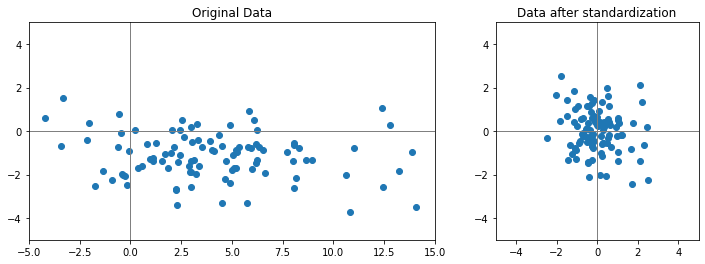

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()


</div><div class="MarkdownView_markdownView__loFxX"><p>다음 이미지는 동일한 데이터를 min-max scaling 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 즉, 각 컬럼의 최솟값은 0, 최댓값은 1로 바꿔줍니다.</p></div><div id="block-a36eda51-2055-46c3-ad42-e4761b1118eb-jupyter_block">

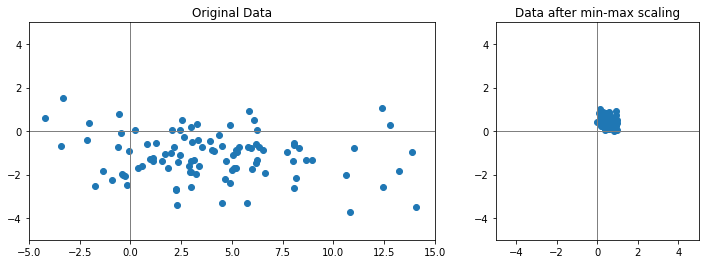

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()


</div><div class="MarkdownView_markdownView__loFxX"><hr/>
<p>그럼 우리가 가진 trade 데이터를 살펴봅시다.</p>
<h3>Standardization</h3>
<hr/>
<p>우선 정규화를 시켜야 할 수치형 컬럼들을 cols 변수에 담은 후, 데이터에서 평균을 빼고, 표준편차로 나눠주도록 합니다.</p></div><div id="block-2d9f4620-0ca0-473c-bb15-9e788504dee5-jupyter_block">

In [ ]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()


,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


</div><div class="MarkdownView_markdownView__loFxX"><p>standardization 방법으로 정규화시킨 trade_Standardization을 확인해 보겠습니다. 각 컬럼의 평균들을 보면 거의 0에 가깝고, 표준편차는 1에 가까운 것을 확인하실 수 있습니다.</p></div><div id="block-fedb368f-400f-4c3e-ae49-a2984bb3e25d-jupyter_block">

In [ ]:
trade_Standardization.describe()


,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,2.277381e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


</div><div class="MarkdownView_markdownView__loFxX"><h3>Min-Max Scaling</h3>
<hr/>
<p>데이터에서 최솟값을 빼주고, '최댓값-최솟값'으로 나눠줍니다.</p></div><div id="block-02533ace-addb-4e3f-83af-d83b5f31dd35-jupyter_block">

In [ ]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


</div><div class="MarkdownView_markdownView__loFxX"><p>Min-Max Scaling 방법으로 정규화시킨 후, 각 컬럼의 최솟값(min)은 0이고, 최댓값(max)은 1임을 확인할 수 있습니다.</p>
<p>우리는 실제로 해당 값에 대한 분포를 정확하게 모르기 때문에 Standardization보다 Min-Max Scaling을 사용해 정규화하겠습니다.</p></div><div id="block-06227981-94eb-4b18-a979-ebc5e78a2e1f-jupyter_block">

In [ ]:
trade.describe()


,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


</div><div class="MarkdownView_markdownView__loFxX"><p><strong>주의</strong>!!</p>
<p>train 데이터와 test 데이터가 나눠져 있는 경우 <strong>train 데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화</strong> 시켜줘야 합니다.</p></div><div id="block-a8856f54-72bc-46e9-869b-432b3989ea95-jupyter_block">

In [ ]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")


👽 It's okay, no biggie.


</div><div class="MarkdownView_markdownView__loFxX"><p>아래 코드를 자세히 보시기 바랍니다.</p></div><div id="block-aad5503f-3e2f-4f2c-87c7-c7717aef554d-jupyter_block">

In [ ]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min)/(train_max - train_min)
test_min_max =  (test - train_min)/(train_max - train_min)    # test를 min-max scaling할 때도 train 정규화 기준으로 수행
print("💫 It's okay, no biggie...")


💫 It's okay, no biggie...


</div><div id="block-8f190f0d-f330-4877-aff5-ffb100bb2083-jupyter_block">

In [ ]:
train_min_max


,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


</div><div id="block-05241584-0425-4f62-9eee-d113c6b3f498-jupyter_block">

In [ ]:
test_min_max


,0,1
0,-0.25,0.55
1,0.00,1.00


</div><div class="MarkdownView_markdownView__loFxX"><p>scikit-learn의 <code>StandardScaler</code>, <code>MinMaxScaler</code>를 사용하는 방법도 있습니다.</p></div><div id="block-d6568362-a440-4d98-842d-a3d396c790f4-jupyter_block">

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")


👽 It's okay, no biggie.


</div><div id="block-96a1519a-9b5b-4eda-8deb-5e89dc3537a9-jupyter_block">

In [ ]:
scaler.fit_transform(train)


array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

</div><div id="block-88b89514-834a-4041-a200-c46e0bf4a956-jupyter_block">

In [ ]:
scaler.transform(test)


array([[-0.25,  0.55]])

</div><iframe allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen="" frameborder="0" height="315" id="block-57e82933-2108-4548-a0cf-58db6492d2f4-embed_block" src="https://www.youtube.com/embed/FDCfw-YqWTE" title="YouTube video player" width="560"></iframe><div class="MarkdownView_markdownView__loFxX"><p>이번 스텝에서 언급하지 않았지만, <strong>로그 변환</strong> 등의 기법도 정규화화 함께 사용하면 도움이 될 수 있다는 것도 기억해 주세요!</p></div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-cSHVUG kuVqkE contents__title"><h1 class="hchang-content__head">6. 원-핫 인코딩(One-Hot Encoding)</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>이제 범주형 데이터인 국가명 컬럼을 다뤄보도록 하겠습니다.</p>
<p>머신러닝이나 딥러닝 프레임워크에서 범주형을 지원하지 않는 경우 원-핫 인코딩을 해야 합니다.</p>
<p>원-핫 인코딩이란 무엇인가요?</p>
<p>원-핫 인코딩이란 카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법입니다. 그럼, pandas로 국가명 컬럼을 원-핫 인코딩을 해보겠습니다.</p>
<p>pandas에서 <code>get_dummies</code> 함수를 통해 손쉽게 원-핫 인코딩을 할 수 있습니다.</p></div><div id="block-536b4e06-1d7d-429b-91d4-c83413fe1cc9-jupyter_block">

In [ ]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()


0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


</div><div class="MarkdownView_markdownView__loFxX"><p><code>pd.concat</code> 함수로 데이터프레임 trade와 country를 합쳐줍니다.</p></div><div id="block-007e113a-ba68-4544-bf44-dfd5a5356434-jupyter_block">

In [ ]:
trade = pd.concat([trade, country], axis=1)
trade.head()


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


</div><div class="MarkdownView_markdownView__loFxX"><p>이제는 필요 없어진 국가명 컬럼을 삭제해 주고 나면 trade는 우리가 원하는 데이터프레임이 됩니다.</p></div><div id="block-647baa61-b9c1-4d98-a73a-103ffe8ab6b3-jupyter_block">

In [ ]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()


,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


</div></div></div>

<div class="StepPage_center__76TTk"><div class="ParserV2_parserV2__DYPIG"><div class="sc-cSHVUG kuVqkE contents__title"><h1 class="hchang-content__head">7. 구간화(Binning)</h1></div><div><div class="MarkdownView_markdownView__loFxX"><p>지금까지 trade 데이터를 다루면서 다양 전처리 기법을 배웠습니다. 이제 다른 전처리 기법을 배워보도록 하겠습니다.</p>
<p>salary에 소득 데이터가 있다고 합시다.</p></div><div id="block-7b178a1d-c236-4663-bf44-c936504f2797-jupyter_block">

In [ ]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
print("👽 Almost there..")


👽 Almost there..


</div><div class="MarkdownView_markdownView__loFxX"><p>이 데이터를 구간별로 나누고자 합니다. 이러한 기법을 구간화(<code>Data binning</code> 혹은 <code>bucketing</code>)이라고 부릅니다.</p>
<p>아래 히스토그램과 같이 연속적인 데이터를 구간을 나눠 분석할 때 사용하는 방법입니다.</p></div><div id="block-97a9bca9-a234-4a48-9345-496e1a98c476-jupyter_block">

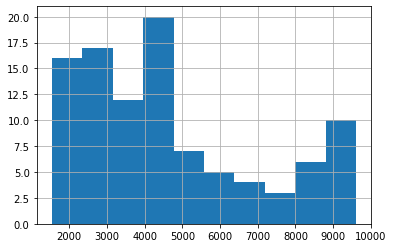

In [ ]:
salary.hist()


</div><div class="MarkdownView_markdownView__loFxX"><p>pandas의 <code>cut</code> 과 <code>qcut</code>을 이용해 수치형 데이터를 범주형 데이터로 변형시키도록 하겠습니다.</p>
<p><code>cut</code>을 사용하기 위해 우선 구간을 정해줍니다.</p></div><div id="block-140d838f-d1bc-41ad-b939-55d73d878172-jupyter_block">

In [ ]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
print("👽 Almost there..")


👽 Almost there..


</div><div class="MarkdownView_markdownView__loFxX"><p>cut 함수에 데이터와 구간을 입력하면 데이터를 구간별로 나눠줍니다.</p></div><div id="block-6b26c810-4040-4e0c-ae54-bbbc1a985ff2-jupyter_block">

In [ ]:
ctg = pd.cut(salary, bins=bins)
ctg


0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] <
                                         (8000, 10000]]

</div><div class="MarkdownView_markdownView__loFxX"><p><code>salary[0]</code>는 4300으로 4000에서 6000 사이에 포함되었다는 것을 확인할 수 있습니다.</p></div><div id="block-93c48635-7294-448e-bdfb-411e5fbe74e4-jupyter_block">

In [ ]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])


salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


</div><div class="MarkdownView_markdownView__loFxX"><p>구간별로 값이 몇 개가 속해 있는지 <code>value_counts()</code>로 확인해 보겠습니다.</p></div><div id="block-6b36bdf2-f6b3-40fd-88d3-b4518d960edb-jupyter_block">

In [ ]:
ctg.value_counts().sort_index()


(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

</div><div class="MarkdownView_markdownView__loFxX"><p>이렇게 특정 구간을 지정해 줘도 되고, 구간의 개수를 지정해 줄 수도 있습니다. <code>bins</code> 옵션에 정수를 입력하면 데이터의 최솟값에서 최댓값을 균등하게 <code>bins</code> 개수만큼 나눠줍니다.</p></div><div id="block-c7fdcdb0-2042-4cc4-a1f6-64cd0193cf14-jupyter_block">

In [ ]:
ctg = pd.cut(salary, bins=6)
ctg


0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] <
                                           (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

</div><div id="block-9a8cdec0-bbb8-411f-ba70-de9a5d5b2f57-jupyter_block">

In [ ]:
ctg.value_counts().sort_index()


</div><div class="MarkdownView_markdownView__loFxX"><p><code>qcut</code>은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠줍니다.</p></div><div id="block-5ddf0df3-9e4a-4efe-bbda-cc5d309b2f2d-jupyter_block">

In [ ]:
ctg = pd.qcut(salary, q=5)
ctg


</div><div id="block-71b80574-958a-4443-b01c-89bdf2831f5d-jupyter_block">

In [ ]:
print(ctg.value_counts().sort_index())
print(".\n.\n🛸 Well done!")


</div><div class="MarkdownView_markdownView__loFxX"><h3>마무리와 복습 과제</h3>
<hr/>
<p>현실에서 여러분이 만날 데이터는 깨끗하지 않은 경우가 많습니다. 그래서 오늘은 표 데이터 전처리하는 방법을 배웠습니다. 어떤 내용을 다뤘는지 키워드로 살펴보겠습니다.</p>
<ul>
<li>결측치(Missing Data)</li>
<li>중복된 데이터</li>
<li>이상치(Outlier)</li>
<li>정규화(Normalization)</li>
<li>원-핫 인코딩(One-Hot Encoding)</li>
<li>구간화(Binning)</li>
</ul>
<p>위의 내용을 배웠지만 모든 데이터에 일괄적으로 적용해야 하는 것은 아닙니다. 데이터 전처리는 데이터의 특성을 파악해서 해야 합니다.</p>
<p>그래서 다소 번거롭게 느껴질 수 있지만 꼭 해야 하는 과정인 만큼 복습해 보시기를 권합니다. 남는 시간 동안 아래 데이터셋의 전처리 과정을 진행해 보세요.</p></div><div id="block-fe698257-047b-4563-8c01-4610282bb59a-document_block"><a download="" href="https://d3s0tskafalll9.cloudfront.net/media/documents/vgsales.csv">vgsales.csv</a></div><div class="MarkdownView_markdownView__loFxX">
<p>위 데이터의 출처는 캐글의 <a href="https://www.kaggle.com/gregorut/videogamesales" target="_blank">Video Game Sales</a> 데이터셋입니다. 16,500개 이상의 비디오 게임에 대한 매출 정보 등이 담겨 있습니다. 혹시 게임을 좋아하시는 분께는 아주 흥미로운 데이터셋이 될지도 모르겠습니다. 위에 언급된 전처리 기법 중 다수를 시도해 볼 수 있는 데이터셋이므로, 오늘 배운 기법들이 본인의 것이 될 수 있도록 복습을 통해 다시 한번 개념을 다져보시기를 권합니다.</p>
<p>이외에도 여러분이 가진 표 데이터를 직접 전처리해 보시면 더욱 흥미롭게 하실 수 있습니다. 데이터가 없다면 <a href="https://www.data.go.kr/" target="_blank">공공데이터포털</a>, <a href="https://www.kaggle.com/" target="_blank">캐글</a>에서 관심 있는 분야의 데이터를 찾아보시기 바랍니다.</p>
<p>수고하셨습니다! 🛸</p></div></div></div>